In [ ]:
#@title Imports & Set Path
!pip3 install pandas_profiling --upgrade

import pandas_profiling
import pandas as pd
from random import randint
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.layers import Dense, LSTM
from keras.layers import Add, Average 
from keras.layers import Dropout, Activation, Input, Flatten
from keras.layers import TimeDistributed, Bidirectional
from keras import optimizers
from keras import regularizers
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split



path = 'Data/' #add the path of your data

     |████████████████████████████████| 245kB 6.5MB/s 
     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 81kB 5.7MB/s 
     |████████████████████████████████| 81kB 6.4MB/s 
     |████████████████████████████████| 1.1MB 8.4MB/s 
     |████████████████████████████████| 3.2MB 17.0MB/s 
     |████████████████████████████████| 296kB 49.5MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=3bfffa4ed04ab5b29647a3d5df54ba1cc01ce4926efa4460a2d1d46d7d10c6be
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=82c788263bc814d24e354afeb5c3d16ac39c55559f155d6f3fa434eead192310
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
Successfully built htmlmin phik
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but yo

In [ ]:
#@title reading from google colab drive 
from google.colab import drive 
drive.mount('/content/gdrive')

path = '/content/gdrive/My Drive/ChallengeUP-master/ChallengeUP-master/Data/'

base = pd.read_csv(path + 'CompleteDataSet_training_competition.csv')


Mounted at /content/gdrive


In [ ]:
base.head()

,TimeStamps,AnkleAccelerometer x-axis,AnkleAccelerometer y-axis,AnkleAccelerometer z-axis,AnkleAngularVelocity x-axis,AnkleAngularVelocity y-axis,AnkleAngularVelocity z-axis,AnkleLuminosity illuminance,RightPocketAccelerometer x-axis,RightPocketAccelerometer y-axis,RightPocketAccelerometer z-axis,RightPocketAngularVelocity x-axis,RightPocketAngularVelocity y-axis,RightPocketAngularVelocity z-axis,RightPocketLuminosity illuminance,BeltAccelerometer x-axis,BeltAccelerometer y-axis,BeltAccelerometer z-axis,BeltAngularVelocity x-axis,BeltAngularVelocity y-axis,BeltAngularVelocity z-axis,BeltLuminosity illuminance,NeckAccelerometer x-axis,NeckAccelerometer y-axis,NeckAccelerometer z-axis,NeckAngularVelocity x-axis,NeckAngularVelocity y-axis,NeckAngularVelocity z-axis,NeckLuminosity illuminance,WristAccelerometer x-axis,WristAccelerometer y-axis,WristAccelerometer z-axis,WristAngularVelocity x-axis,WristAngularVelocity y-axis,WristAngularVelocity z-axis,WristLuminosity illuminance,BrainSensor,Infrared1,Infrared2,Infrared3,Infrared4,Infrared5,Infrared6,Subject,Trial,Activity,Tag
0,2018-07-04T12:04:17.738369,-1.005,0.229,-0.083,-0.671,0.488,-2.683,0.0,-0.981,0.260,0.098,1.768,-1.890,0.732,0.0,0.146,0.895,0.367,-1.463,-3.841,-2.622,392.633,-0.672,0.072,-0.815,-3.293,-7.805,9.207,1231.336,-1.240,-0.557,0.227,-75.854,44.024,315.915,2108.154,45,1,1,1,1,1,1,1,1,1,7
1,2018-07-04T12:04:17.790509,-1.005,0.228,-0.082,-3.415,-0.549,0.122,0.0,-0.981,0.260,0.098,3.354,-2.500,-0.061,0.0,0.146,0.895,0.367,1.037,-4.024,-1.768,392.633,-0.672,0.072,-0.815,-9.756,-8.049,5.122,1231.336,-1.240,-0.557,0.227,-28.780,55.549,344.146,2108.154,1,1,1,1,1,1,1,1,1,1,7
2,2018-07-04T12:04:17.836632,-1.005,0.231,-0.079,-2.622,-1.402,-0.549,0.0,-0.975,0.282,0.091,3.720,-2.500,-0.793,0.0,0.178,0.896,0.373,0.366,-2.500,-0.488,392.633,-0.705,0.084,-0.779,-17.866,-18.354,4.329,1231.336,-1.884,-0.687,0.251,27.256,87.134,372.012,2108.154,325,1,1,1,1,1,1,1,1,1,7
3,2018-07-04T12:04:17.885262,-1.005,0.231,-0.079,-2.561,-2.195,-1.220,0.0,-0.973,0.301,0.103,-1.951,-1.159,-1.280,0.0,0.160,0.895,0.372,0.854,1.951,1.585,392.633,-0.727,0.095,-0.758,-18.537,-10.061,0.366,1231.336,-1.884,-0.687,0.251,2.866,117.683,356.463,2108.154,396,1,1,1,1,1,1,1,1,1,7
4,2018-07-04T12:04:17.945423,-1.008,0.229,-0.072,-3.537,-2.073,-0.305,0.0,-0.973,0.301,0.103,-5.366,-1.280,-0.732,0.0,0.160,0.895,0.372,2.012,4.634,3.354,392.633,-0.727,0.095,-0.758,4.878,2.866,-3.232,1231.336,-1.597,-0.646,0.112,10.000,30.671,126.768,2108.154,-436,1,1,1,1,1,1,1,1,1,7


In [ ]:
base.describe()

,AnkleAccelerometer x-axis,AnkleAccelerometer y-axis,AnkleAccelerometer z-axis,AnkleAngularVelocity x-axis,AnkleAngularVelocity y-axis,AnkleAngularVelocity z-axis,AnkleLuminosity illuminance,RightPocketAccelerometer x-axis,RightPocketAccelerometer y-axis,RightPocketAccelerometer z-axis,RightPocketAngularVelocity x-axis,RightPocketAngularVelocity y-axis,RightPocketAngularVelocity z-axis,RightPocketLuminosity illuminance,BeltAccelerometer x-axis,BeltAccelerometer y-axis,BeltAccelerometer z-axis,BeltAngularVelocity x-axis,BeltAngularVelocity y-axis,BeltAngularVelocity z-axis,BeltLuminosity illuminance,NeckAccelerometer x-axis,NeckAccelerometer y-axis,NeckAccelerometer z-axis,NeckAngularVelocity x-axis,NeckAngularVelocity y-axis,NeckAngularVelocity z-axis,NeckLuminosity illuminance,WristAccelerometer x-axis,WristAccelerometer y-axis,WristAccelerometer z-axis,WristAngularVelocity x-axis,WristAngularVelocity y-axis,WristAngularVelocity z-axis,WristLuminosity illuminance,BrainSensor,Infrared1,Infrared2,Infrared3,Infrared4,Infrared5,Infrared6,Subject,Trial,Activity,Tag
count,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000,160736.000000
mean,-0.420801,0.061964,-0.101354,-2.024454,0.524680,-0.179078,627.691213,-0.252088,-0.031123,0.286182,-2.375525,-1.745087,0.697777,8.030088,0.188054,-0.128356,0.082287,2.300136,0.512186,-0.180413,462.577610,-0.074661,0.013081,-0.336165,-0.015310,0.508494,-2.300614,978.235555,-0.198389,-0.252410,0.146394,-0.069657,-0.650516,0.298418,983.620662,58.058761,0.828688,0.902075,0.656710,0.857033,0.860535,0.728325,8.314609,1.997785,7.415638,8.429481
std,0.799249,0.486330,0.414364,43.817883,43.808611,63.426712,654.221412,0.719383,0.461120,0.590869,36.276788,39.102539,30.897224,10.641890,0.443396,0.770771,0.626987,68.796875,46.481304,55.600792,585.744462,0.717726,0.276382,0.730438,35.445701,49.808461,29.343901,722.217187,0.759339,0.568234,0.538453,67.966391,42.588818,52.226618,918.056257,440.538444,0.376783,0.297214,0.474809,0.350041,0.346432,0.444825,4.461991,0.817260,2.599210,2.382925
min,-3.036000,-4.948000,-5.950000,-630.671000,-651.890000,-643.232000,0.000000,-4.293000,-4.170000,-3.894000,-698.110000,-801.951000,-930.061000,0.000000,-4.443000,-4.504000,-5.375000,-1054.512000,-1301.098000,-868.659000,0.000000,-4.253000,-4.442000,-8.010000,-940.183000,-1125.488000,-607.439000,0.000000,-4.601000,-5.372000,-9.259000,-1164.939000,-725.671000,-576.768000,0.000000,-2048.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,-1.007000,-0.141000,-0.308000,-1.524000,-0.244000,-1.159000,257.413000,-0.931000,-0.195000,-0.071000,-2.561000,-2.134000,-0.976000,0.000000,-0.146000,-0.753000,-0.334000,-0.793000,-1.768000,-0.732000,9.244000,-0.661000,-0.094000,-0.793000,-2.744000,-3.049000,-3.537000,402.296000,-0.868000,-0.580000,-0.122000,-4.085000,-2.683000,-2.622000,270.252000,-21.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,4.000000,1.000000,6.000000,7.000000
50%,-0.702000,0.111000,-0.059000,-0.488000,0.610000,0.000000,423.982000,-0.217000,-0.024000,0.180000,-0.549000,-0.915000,-0.244000,2.607000,0.100000,-0.187000,-0.013000,0.610000,0.122000,0.305000,156.205000,-0.187000,0.012000,-0.567000,0.488000,0.427000,0.122000,757.895000,-0.237000,-0.308000,0.136000,0.183000,0.366000,0.183000,729.166000,59.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,2.000000,7.000000,8.00000

In [ ]:
base.shape

(160736, 47)

In [ ]:
base.isnull().sum()

TimeStamps                           0
AnkleAccelerometer x-axis            0
AnkleAccelerometer y-axis            0
AnkleAccelerometer z-axis            0
AnkleAngularVelocity x-axis          0
AnkleAngularVelocity y-axis          0
AnkleAngularVelocity z-axis          0
AnkleLuminosity illuminance          0
RightPocketAccelerometer x-axis      0
RightPocketAccelerometer y-axis      0
RightPocketAccelerometer z-axis      0
RightPocketAngularVelocity x-axis    0
RightPocketAngularVelocity y-axis    0
RightPocketAngularVelocity z-axis    0
RightPocketLuminosity illuminance    0
BeltAccelerometer x-axis             0
BeltAccelerometer y-axis             0
BeltAccelerometer z-axis             0
BeltAngularVelocity x-axis           0
BeltAngularVelocity y-axis           0
BeltAngularVelocity z-axis           0
BeltLuminosity illuminance           0
NeckAccelerometer x-axis             0
NeckAccelerometer y-axis             0
NeckAccelerometer z-axis             0
NeckAngularVelocity x-axi

In [ ]:
base['TimeStamps'] = pd.to_datetime(base['TimeStamps'])


In [ ]:
abs(base.corr()["Tag"].sort_values(ascending=False))

Tag                                  1.000000
NeckAccelerometer z-axis             0.438453
Activity                             0.276564
BeltAccelerometer z-axis             0.262309
AnkleAccelerometer x-axis            0.229567
RightPocketAccelerometer z-axis      0.211504
RightPocketLuminosity illuminance    0.209057
RightPocketAccelerometer y-axis      0.173747
Infrared1                            0.137097
Infrared2                            0.136782
WristAccelerometer x-axis            0.127920
RightPocketAccelerometer x-axis      0.127794
NeckAngularVelocity z-axis           0.092959
BeltLuminosity illuminance           0.071789
Infrared5                            0.063393
NeckAccelerometer y-axis             0.059060
RightPocketAngularVelocity x-axis    0.058988
WristAccelerometer z-axis            0.042582
AnkleAngularVelocity x-axis          0.034587
WristAngularVelocity y-axis          0.033337
RightPocketAngularVelocity y-axis    0.022816
Subject                           

In [ ]:
# base.profile_report()

In [ ]:
Falling1 = (base["Tag"].values==1).sum()
Falling2 = (base["Tag"].values==2).sum()
Falling3 = (base["Tag"].values==3).sum()
Falling4 = (base["Tag"].values==4).sum()
Falling5 = (base["Tag"].values==5).sum()
Walking = (base["Tag"].values==6).sum()
Standing = (base["Tag"].values==7).sum()
Sitting = (base["Tag"].values==8).sum()
Object = (base["Tag"].values==9).sum()
Jumping = (base["Tag"].values==10).sum()
Laying = (base["Tag"].values==11).sum()
Other = (base["Tag"].values==20).sum()

In [ ]:
frequency_dict = {"Fall1": Falling1,
                  "Fall2": Falling2,
                  "Fall3": Falling3,
                  "Fall4": Falling4,
                  "Fall5": Falling5,
                  "Walk": Walking,
                  "Stand": Standing,
                  "Sit": Sitting,
                  "Pick": Object,
                  "Jump": Jumping,
                  "Lay": Laying,
                  "NA" : Other}

In [ ]:
frequency = pd.DataFrame(list(frequency_dict.items()),columns=["Activity","Count"])
frequency.head(12)

,Activity,Count
0,Fall1,759
1,Fall2,721
2,Fall3,974
3,Fall4,838
4,Fall5,999
5,Walk,29649
6,Stand,35257
7,Sit,28911
8,Pick,1002
9,Jump,14448


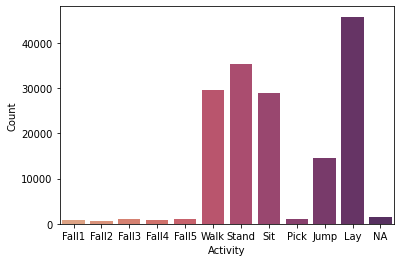

In [ ]:
ax = sns.barplot(x="Activity",y="Count", data=frequency, palette="flare")

In [ ]:
x = base.drop(["TimeStamps","Tag","Subject","Trial","Activity"],axis=1)

x

,AnkleAccelerometer x-axis,AnkleAccelerometer y-axis,AnkleAccelerometer z-axis,AnkleAngularVelocity x-axis,AnkleAngularVelocity y-axis,AnkleAngularVelocity z-axis,AnkleLuminosity illuminance,RightPocketAccelerometer x-axis,RightPocketAccelerometer y-axis,RightPocketAccelerometer z-axis,RightPocketAngularVelocity x-axis,RightPocketAngularVelocity y-axis,RightPocketAngularVelocity z-axis,RightPocketLuminosity illuminance,BeltAccelerometer x-axis,BeltAccelerometer y-axis,BeltAccelerometer z-axis,BeltAngularVelocity x-axis,BeltAngularVelocity y-axis,BeltAngularVelocity z-axis,BeltLuminosity illuminance,NeckAccelerometer x-axis,NeckAccelerometer y-axis,NeckAccelerometer z-axis,NeckAngularVelocity x-axis,NeckAngularVelocity y-axis,NeckAngularVelocity z-axis,NeckLuminosity illuminance,WristAccelerometer x-axis,WristAccelerometer y-axis,WristAccelerometer z-axis,WristAngularVelocity x-axis,WristAngularVelocity y-axis,WristAngularVelocity z-axis,WristLuminosity illuminance,BrainSensor,Infrared1,Infrared2,Infrared3,Infrared4,Infrared5,Infrared6
0,-1.005,0.229,-0.083,-0.671,0.488,-2.683,0.000,-0.981,0.260,0.098,1.768,-1.890,0.732,0.00,0.146,0.895,0.367,-1.463,-3.841,-2.622,392.633,-0.672,0.072,-0.815,-3.293,-7.805,9.207,1231.336,-1.240,-0.557,0.227,-75.854,44.024,315.915,2108.154,45,1,1,1,1,1,1
1,-1.005,0.228,-0.082,-3.415,-0.549,0.122,0.000,-0.981,0.260,0.098,3.354,-2.500,-0.061,0.00,0.146,0.895,0.367,1.037,-4.024,-1.768,392.633,-0.672,0.072,-0.815,-9.756,-8.049,5.122,1231.336,-1.240,-0.557,0.227,-28.780,55.549,344.146,2108.154,1,1,1,1,1,1,1
2,-1.005,0.231,-0.079,-2.622,-1.402,-0.549,0.000,-0.975,0.282,0.091,3.720,-2.500,-0.793,0.00,0.178,0.896,0.373,0.366,-2.500,-0.488,392.633,-0.705,0.084,-0.779,-17.866,-18.354,4.329,1231.336,-1.884,-0.687,0.251,27.256,87.134,372.012,2108.154,325,1,1,1,1,1,1
3,-1.005,0.231,-0.079,-2.561,-2.195,-1.220,0.000,-0.973,0.301,0.103,-1.951,-1.159,-1.280,0.00,0.160,0.895,0.372,0.854,1.951,1.585,392.633,-0.727,0.095,-0.758,-18.537,-10.061,0.366,1231.336,-1.884,-0.687,0.251,2.866,117.683,356.463,2108.154,396,1,1,1,1,1,1
4,-1.008,0.229,-0.072,-3.537,-2.073,-0.305,0.000,-0.973,0.301,0.103,-5.366,-1.280,-0.732,0.00,0.160,0.895,0.372,2.012,4.634,3.354,392.633,-0.727,0.095,-0.758,4.878,2.866,-3.232,1231.336,-1.597,-0.646,0.112,10.000,30.671,126.768,2108.154,-436,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160731,-0.270,-0.794,0.586,-0.854,0.732,0.183,716.916,-0.138,0.172,1.062,0.366,-0.854,-0.488,25.48,0.138,0.704,0.698,0.305,0.061,0.427,993.364,0.220,0.467,0.816,0.732,-0.183,1.159,1013.833,-0.262,-0.873,0.533,0.488,0.305,0.183,575.098,72,1,1,0,1,1,1
160732,-0.267,-0.792,0.588,-0.427,0.732,0.122,716.916,-0.138,0.171,1.063,0.671,-0.061,-0.915,25.48,0.139,0.701,0.701,-0.427,-0.183,0.122,993.364,0.220,0.469,0.819,0.671,0.061,0.244,1013.833,-0.261,-0.872,0.535,0.671,0.366,0.122,575.098,71,1,1,0,1,1,1
160733,-0.267,-0.792,0.588,-0.610,0.976,0.244,716.916,-0.140,0.174,1.060,0.549,-0.244,-0.732,25.48,0.138,0.699,0.701,-0.244,-0.305,0.244,993.364,0.222,0.471,0.816,0.976,0.000,0.061,1013.833,-0.262,-0.874,0.535,-0.122,0.549,0.305,575.098,83,1,1,0,1,1,1
160734,-0.270,-0.794,0.586,-0.549,0.915,0.305,716.916,-0.140,0.174,1.060,0.549,-0.854,-0.549,25.48,0.138,0.701,0.701,-0.183,-0.549,0.610,993.364,0.225,0.470,0.820,0.793,0.061,0.000,1013.833,-0.262,-0.874,0.535,0.305,0.427,0.183,575.098,148,1,1,0,1,1,1


In [ ]:
y = base["Tag"]
y = pd.DataFrame(y,columns=["Tag"])


In [ ]:
x.shape

(160736, 42)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160736 entries, 0 to 160735
Data columns (total 42 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   AnkleAccelerometer x-axis          160736 non-null  float64
 1   AnkleAccelerometer y-axis          160736 non-null  float64
 2   AnkleAccelerometer z-axis          160736 non-null  float64
 3   AnkleAngularVelocity x-axis        160736 non-null  float64
 4   AnkleAngularVelocity y-axis        160736 non-null  float64
 5   AnkleAngularVelocity z-axis        160736 non-null  float64
 6   AnkleLuminosity illuminance        160736 non-null  float64
 7   RightPocketAccelerometer x-axis    160736 non-null  float64
 8   RightPocketAccelerometer y-axis    160736 non-null  float64
 9   RightPocketAccelerometer z-axis    160736 non-null  float64
 10  RightPocketAngularVelocity x-axis  160736 non-null  float64
 11  RightPocketAngularVelocity y-axis  1607

In [ ]:
columns2 = [col for col in x.columns]
columns2

['AnkleAccelerometer x-axis',
 'AnkleAccelerometer y-axis',
 'AnkleAccelerometer z-axis',
 'AnkleAngularVelocity x-axis ',
 'AnkleAngularVelocity y-axis ',
 'AnkleAngularVelocity z-axis ',
 'AnkleLuminosity illuminance ',
 'RightPocketAccelerometer x-axis ',
 'RightPocketAccelerometer y-axis ',
 'RightPocketAccelerometer z-axis ',
 'RightPocketAngularVelocity x-axis',
 'RightPocketAngularVelocity y-axis',
 'RightPocketAngularVelocity z-axis',
 'RightPocketLuminosity illuminance',
 'BeltAccelerometer x-axis',
 'BeltAccelerometer y-axis',
 'BeltAccelerometer z-axis',
 'BeltAngularVelocity x-axis',
 'BeltAngularVelocity y-axis',
 'BeltAngularVelocity z-axis',
 'BeltLuminosity illuminance',
 'NeckAccelerometer x-axis',
 'NeckAccelerometer y-axis',
 'NeckAccelerometer z-axis',
 'NeckAngularVelocity x-axis',
 'NeckAngularVelocity y-axis',
 'NeckAngularVelocity z-axis',
 'NeckLuminosity illuminance',
 'WristAccelerometer x-axis',
 'WristAccelerometer y-axis',
 'WristAccelerometer z-axis',
 'W

In [ ]:
# x = x.drop(["Infrared1","Infrared2","Infrared3","Infrared4","Infrared5","Infrared6","AnkleLuminosity illuminance ", "RightPocketLuminosity illuminance", "BeltLuminosity illuminance", "NeckLuminosity illuminance","WristLuminosity illuminance", "BrainSensor"],axis=1)
x = x.drop(["Infrared1","Infrared2","Infrared3","Infrared4","Infrared5","Infrared6","AnkleLuminosity illuminance ", "RightPocketLuminosity illuminance", "BeltLuminosity illuminance", "NeckLuminosity illuminance","WristLuminosity illuminance", "BrainSensor"],axis=1)

In [ ]:
x.head()

,AnkleAccelerometer x-axis,AnkleAccelerometer y-axis,AnkleAccelerometer z-axis,AnkleAngularVelocity x-axis,AnkleAngularVelocity y-axis,AnkleAngularVelocity z-axis,RightPocketAccelerometer x-axis,RightPocketAccelerometer y-axis,RightPocketAccelerometer z-axis,RightPocketAngularVelocity x-axis,RightPocketAngularVelocity y-axis,RightPocketAngularVelocity z-axis,BeltAccelerometer x-axis,BeltAccelerometer y-axis,BeltAccelerometer z-axis,BeltAngularVelocity x-axis,BeltAngularVelocity y-axis,BeltAngularVelocity z-axis,NeckAccelerometer x-axis,NeckAccelerometer y-axis,NeckAccelerometer z-axis,NeckAngularVelocity x-axis,NeckAngularVelocity y-axis,NeckAngularVelocity z-axis,WristAccelerometer x-axis,WristAccelerometer y-axis,WristAccelerometer z-axis,WristAngularVelocity x-axis,WristAngularVelocity y-axis,WristAngularVelocity z-axis
0,-1.005,0.229,-0.083,-0.671,0.488,-2.683,-0.981,0.260,0.098,1.768,-1.890,0.732,0.146,0.895,0.367,-1.463,-3.841,-2.622,-0.672,0.072,-0.815,-3.293,-7.805,9.207,-1.240,-0.557,0.227,-75.854,44.024,315.915
1,-1.005,0.228,-0.082,-3.415,-0.549,0.122,-0.981,0.260,0.098,3.354,-2.500,-0.061,0.146,0.895,0.367,1.037,-4.024,-1.768,-0.672,0.072,-0.815,-9.756,-8.049,5.122,-1.240,-0.557,0.227,-28.780,55.549,344.146
2,-1.005,0.231,-0.079,-2.622,-1.402,-0.549,-0.975,0.282,0.091,3.720,-2.500,-0.793,0.178,0.896,0.373,0.366,-2.500,-0.488,-0.705,0.084,-0.779,-17.866,-18.354,4.329,-1.884,-0.687,0.251,27.256,87.134,372.012
3,-1.005,0.231,-0.079,-2.561,-2.195,-1.220,-0.973,0.301,0.103,-1.951,-1.159,-1.280,0.160,0.895,0.372,0.854,1.951,1.585,-0.727,0.095,-0.758,-18.537,-10.061,0.366,-1.884,-0.687,0.251,2.866,117.683,356.463
4,-1.008,0.229,-0.072,-3.537,-2.073,-0.305,-0.973,0.301,0.103,-5.366,-1.280,-0.732,0.160,0.895,0.372,2.012,4.634,3.354,-0.727,0.095,-0.758,4.878,2.866,-3.232,-1.597,-0.646,0.112,10.000,30.671,126.768


In [ ]:
# from imblearn.over_sampling import SMOTE
# from sklearn.utils import class_weight
# smote = SMOTE()

X_train, Y_train = smote.fit_resample(x,y)

# X_train, Y_train = x.values,y.values # for without smote

In [ ]:
Y_train

array([ 7,  7,  7, ..., 20, 20, 20])

In [ ]:
columns = [col for col in x.columns]
columns

['AnkleAccelerometer x-axis',
 'AnkleAccelerometer y-axis',
 'AnkleAccelerometer z-axis',
 'AnkleAngularVelocity x-axis ',
 'AnkleAngularVelocity y-axis ',
 'AnkleAngularVelocity z-axis ',
 'RightPocketAccelerometer x-axis ',
 'RightPocketAccelerometer y-axis ',
 'RightPocketAccelerometer z-axis ',
 'RightPocketAngularVelocity x-axis',
 'RightPocketAngularVelocity y-axis',
 'RightPocketAngularVelocity z-axis',
 'BeltAccelerometer x-axis',
 'BeltAccelerometer y-axis',
 'BeltAccelerometer z-axis',
 'BeltAngularVelocity x-axis',
 'BeltAngularVelocity y-axis',
 'BeltAngularVelocity z-axis',
 'NeckAccelerometer x-axis',
 'NeckAccelerometer y-axis',
 'NeckAccelerometer z-axis',
 'NeckAngularVelocity x-axis',
 'NeckAngularVelocity y-axis',
 'NeckAngularVelocity z-axis',
 'WristAccelerometer x-axis',
 'WristAccelerometer y-axis',
 'WristAccelerometer z-axis',
 'WristAngularVelocity x-axis',
 'WristAngularVelocity y-axis',
 'WristAngularVelocity z-axis']

In [ ]:
X_train.shape

(548784, 30)

In [ ]:
Y_train.shape

(548784,)

In [ ]:
X2 = pd.DataFrame(X_train, columns=[col for col in columns])

In [ ]:
Y2 = pd.DataFrame(Y_train,columns=["Tag"])

In [ ]:
Y2.head()

,Tag
0,7
1,7
2,7
3,7
4,7


In [ ]:
Y2.shape

(548784, 1)

In [ ]:
Y2.head()

,Tag
0,7
1,7
2,7
3,7
4,7


In [ ]:
Y_train[1]

7

In [ ]:
X2.head()

,AnkleAccelerometer x-axis,AnkleAccelerometer y-axis,AnkleAccelerometer z-axis,AnkleAngularVelocity x-axis,AnkleAngularVelocity y-axis,AnkleAngularVelocity z-axis,RightPocketAccelerometer x-axis,RightPocketAccelerometer y-axis,RightPocketAccelerometer z-axis,RightPocketAngularVelocity x-axis,RightPocketAngularVelocity y-axis,RightPocketAngularVelocity z-axis,BeltAccelerometer x-axis,BeltAccelerometer y-axis,BeltAccelerometer z-axis,BeltAngularVelocity x-axis,BeltAngularVelocity y-axis,BeltAngularVelocity z-axis,NeckAccelerometer x-axis,NeckAccelerometer y-axis,NeckAccelerometer z-axis,NeckAngularVelocity x-axis,NeckAngularVelocity y-axis,NeckAngularVelocity z-axis,WristAccelerometer x-axis,WristAccelerometer y-axis,WristAccelerometer z-axis,WristAngularVelocity x-axis,WristAngularVelocity y-axis,WristAngularVelocity z-axis
0,-1.005,0.229,-0.083,-0.671,0.488,-2.683,-0.981,0.260,0.098,1.768,-1.890,0.732,0.146,0.895,0.367,-1.463,-3.841,-2.622,-0.672,0.072,-0.815,-3.293,-7.805,9.207,-1.240,-0.557,0.227,-75.854,44.024,315.915
1,-1.005,0.228,-0.082,-3.415,-0.549,0.122,-0.981,0.260,0.098,3.354,-2.500,-0.061,0.146,0.895,0.367,1.037,-4.024,-1.768,-0.672,0.072,-0.815,-9.756,-8.049,5.122,-1.240,-0.557,0.227,-28.780,55.549,344.146
2,-1.005,0.231,-0.079,-2.622,-1.402,-0.549,-0.975,0.282,0.091,3.720,-2.500,-0.793,0.178,0.896,0.373,0.366,-2.500,-0.488,-0.705,0.084,-0.779,-17.866,-18.354,4.329,-1.884,-0.687,0.251,27.256,87.134,372.012
3,-1.005,0.231,-0.079,-2.561,-2.195,-1.220,-0.973,0.301,0.103,-1.951,-1.159,-1.280,0.160,0.895,0.372,0.854,1.951,1.585,-0.727,0.095,-0.758,-18.537,-10.061,0.366,-1.884,-0.687,0.251,2.866,117.683,356.463
4,-1.008,0.229,-0.072,-3.537,-2.073,-0.305,-0.973,0.301,0.103,-5.366,-1.280,-0.732,0.160,0.895,0.372,2.012,4.634,3.354,-0.727,0.095,-0.758,4.878,2.866,-3.232,-1.597,-0.646,0.112,10.000,30.671,126.768


In [ ]:
Y2.head()

,Tag
0,7
1,7
2,7
3,7
4,7


In [ ]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548784 entries, 0 to 548783
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   AnkleAccelerometer x-axis          548784 non-null  float64
 1   AnkleAccelerometer y-axis          548784 non-null  float64
 2   AnkleAccelerometer z-axis          548784 non-null  float64
 3   AnkleAngularVelocity x-axis        548784 non-null  float64
 4   AnkleAngularVelocity y-axis        548784 non-null  float64
 5   AnkleAngularVelocity z-axis        548784 non-null  float64
 6   RightPocketAccelerometer x-axis    548784 non-null  float64
 7   RightPocketAccelerometer y-axis    548784 non-null  float64
 8   RightPocketAccelerometer z-axis    548784 non-null  float64
 9   RightPocketAngularVelocity x-axis  548784 non-null  float64
 10  RightPocketAngularVelocity y-axis  548784 non-null  float64
 11  RightPocketAngularVelocity z-axis  5487

In [ ]:
X2["Tag"] = Y2["Tag"]

In [ ]:
X2.head()

,AnkleAccelerometer x-axis,AnkleAccelerometer y-axis,AnkleAccelerometer z-axis,AnkleAngularVelocity x-axis,AnkleAngularVelocity y-axis,AnkleAngularVelocity z-axis,RightPocketAccelerometer x-axis,RightPocketAccelerometer y-axis,RightPocketAccelerometer z-axis,RightPocketAngularVelocity x-axis,RightPocketAngularVelocity y-axis,RightPocketAngularVelocity z-axis,BeltAccelerometer x-axis,BeltAccelerometer y-axis,BeltAccelerometer z-axis,BeltAngularVelocity x-axis,BeltAngularVelocity y-axis,BeltAngularVelocity z-axis,NeckAccelerometer x-axis,NeckAccelerometer y-axis,NeckAccelerometer z-axis,NeckAngularVelocity x-axis,NeckAngularVelocity y-axis,NeckAngularVelocity z-axis,WristAccelerometer x-axis,WristAccelerometer y-axis,WristAccelerometer z-axis,WristAngularVelocity x-axis,WristAngularVelocity y-axis,WristAngularVelocity z-axis,Tag
0,-1.005,0.229,-0.083,-0.671,0.488,-2.683,-0.981,0.260,0.098,1.768,-1.890,0.732,0.146,0.895,0.367,-1.463,-3.841,-2.622,-0.672,0.072,-0.815,-3.293,-7.805,9.207,-1.240,-0.557,0.227,-75.854,44.024,315.915,7
1,-1.005,0.228,-0.082,-3.415,-0.549,0.122,-0.981,0.260,0.098,3.354,-2.500,-0.061,0.146,0.895,0.367,1.037,-4.024,-1.768,-0.672,0.072,-0.815,-9.756,-8.049,5.122,-1.240,-0.557,0.227,-28.780,55.549,344.146,7
2,-1.005,0.231,-0.079,-2.622,-1.402,-0.549,-0.975,0.282,0.091,3.720,-2.500,-0.793,0.178,0.896,0.373,0.366,-2.500,-0.488,-0.705,0.084,-0.779,-17.866,-18.354,4.329,-1.884,-0.687,0.251,27.256,87.134,372.012,7
3,-1.005,0.231,-0.079,-2.561,-2.195,-1.220,-0.973,0.301,0.103,-1.951,-1.159,-1.280,0.160,0.895,0.372,0.854,1.951,1.585,-0.727,0.095,-0.758,-18.537,-10.061,0.366,-1.884,-0.687,0.251,2.866,117.683,356.463,7
4,-1.008,0.229,-0.072,-3.537,-2.073,-0.305,-0.973,0.301,0.103,-5.366,-1.280,-0.732,0.160,0.895,0.372,2.012,4.634,3.354,-0.727,0.095,-0.758,4.878,2.866,-3.232,-1.597,-0.646,0.112,10.000,30.671,126.768,7


In [ ]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548784 entries, 0 to 548783
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   AnkleAccelerometer x-axis          548784 non-null  float64
 1   AnkleAccelerometer y-axis          548784 non-null  float64
 2   AnkleAccelerometer z-axis          548784 non-null  float64
 3   AnkleAngularVelocity x-axis        548784 non-null  float64
 4   AnkleAngularVelocity y-axis        548784 non-null  float64
 5   AnkleAngularVelocity z-axis        548784 non-null  float64
 6   RightPocketAccelerometer x-axis    548784 non-null  float64
 7   RightPocketAccelerometer y-axis    548784 non-null  float64
 8   RightPocketAccelerometer z-axis    548784 non-null  float64
 9   RightPocketAngularVelocity x-axis  548784 non-null  float64
 10  RightPocketAngularVelocity y-axis  548784 non-null  float64
 11  RightPocketAngularVelocity z-axis  5487

In [ ]:
Falling1 = (X2["Tag"].values==1).sum()
Falling2 = (X2["Tag"].values==2).sum()
Falling3 = (X2["Tag"].values==3).sum()
Falling4 = (X2["Tag"].values==4).sum()
Falling5 = (X2["Tag"].values==5).sum()
Walking = (X2["Tag"].values==6).sum()
Standing = (X2["Tag"].values==7).sum()
Sitting = (X2["Tag"].values==8).sum()
Object = (X2["Tag"].values==9).sum()
Jumping = (X2["Tag"].values==10).sum()
Laying = (X2["Tag"].values==11).sum()
Other = (X2["Tag"].values==20).sum()

In [ ]:
frequency_dict = {"Falling1": Falling1,
                  "Falling2": Falling2,
                  "Falling3": Falling3,
                  "Falling4": Falling4,
                  "Falling5": Falling5,
                  "Walking": Walking,
                  "Standing": Standing,
                  "Sitting": Sitting,
                  "Object": Object,
                  "Jumping": Jumping,
                  "Laying": Laying,
                  "Other" : Other}

In [ ]:
frequency = pd.DataFrame(list(frequency_dict.items()),columns=["Activity","Count"])
frequency.head(12)

,Activity,Count
0,Falling1,45732
1,Falling2,45732
2,Falling3,45732
3,Falling4,45732
4,Falling5,45732
5,Walking,45732
6,Standing,45732
7,Sitting,45732
8,Object,45732
9,Jumping,45732


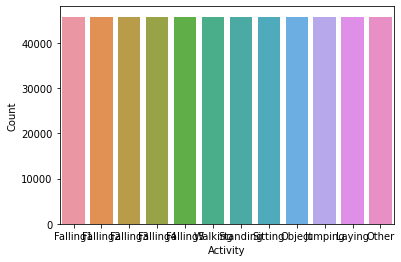

In [ ]:
ax = sns.barplot(x="Activity",y="Count", data=frequency)

In [ ]:
X2.head(50)

,AnkleAccelerometer x-axis,AnkleAccelerometer y-axis,AnkleAccelerometer z-axis,AnkleAngularVelocity x-axis,AnkleAngularVelocity y-axis,AnkleAngularVelocity z-axis,RightPocketAccelerometer x-axis,RightPocketAccelerometer y-axis,RightPocketAccelerometer z-axis,RightPocketAngularVelocity x-axis,RightPocketAngularVelocity y-axis,RightPocketAngularVelocity z-axis,BeltAccelerometer x-axis,BeltAccelerometer y-axis,BeltAccelerometer z-axis,BeltAngularVelocity x-axis,BeltAngularVelocity y-axis,BeltAngularVelocity z-axis,NeckAccelerometer x-axis,NeckAccelerometer y-axis,NeckAccelerometer z-axis,NeckAngularVelocity x-axis,NeckAngularVelocity y-axis,NeckAngularVelocity z-axis,WristAccelerometer x-axis,WristAccelerometer y-axis,WristAccelerometer z-axis,WristAngularVelocity x-axis,WristAngularVelocity y-axis,WristAngularVelocity z-axis,Tag
0,-1.005,0.229,-0.083,-0.671,0.488,-2.683,-0.981,0.260,0.098,1.768,-1.890,0.732,0.146,0.895,0.367,-1.463,-3.841,-2.622,-0.672,0.072,-0.815,-3.293,-7.805,9.207,-1.240,-0.557,0.227,-75.854,44.024,315.915,7
1,-1.005,0.228,-0.082,-3.415,-0.549,0.122,-0.981,0.260,0.098,3.354,-2.500,-0.061,0.146,0.895,0.367,1.037,-4.024,-1.768,-0.672,0.072,-0.815,-9.756,-8.049,5.122,-1.240,-0.557,0.227,-28.780,55.549,344.146,7
2,-1.005,0.231,-0.079,-2.622,-1.402,-0.549,-0.975,0.282,0.091,3.720,-2.500,-0.793,0.178,0.896,0.373,0.366,-2.500,-0.488,-0.705,0.084,-0.779,-17.866,-18.354,4.329,-1.884,-0.687,0.251,27.256,87.134,372.012,7
3,-1.005,0.231,-0.079,-2.561,-2.195,-1.220,-0.973,0.301,0.103,-1.951,-1.159,-1.280,0.160,0.895,0.372,0.854,1.951,1.585,-0.727,0.095,-0.758,-18.537,-10.061,0.366,-1.884,-0.687,0.251,2.866,117.683,356.463,7
4,-1.008,0.229,-0.072,-3.537,-2.073,-0.305,-0.973,0.301,0.103,-5.366,-1.280,-0.732,0.160,0.895,0.372,2.012,4.634,3.354,-0.727,0.095,-0.758,4.878,2.866,-3.232,-1.597,-0.646,0.112,10.000,30.671,126.768,7
5,-1.005,0.223,-0.066,-10.488,-2.195,0.610,-0.983,0.266,0.117,-5.000,0.183,-1.890,0.082,0.902,0.359,6.341,0.854,2.988,-0.707,0.042,-0.778,11.463,-12.622,6.585,-1.096,-0.204,0.179,21.524,40.427,26.890,7
6,-1.005,0.223,-0.066,-8.841,-2.561,0.793,-0.999,0.200,0.119,-2.683,2.500,-2.927,0.063,0.913,0.366,4.817,-3.963,0.427,-0.637,0.132,-0.809,-4.939,0.488,1.768,-0.860,-0.527,0.235,-103.537,3.293,-39.939,7
7,-1.008,0.220,-0.062,1.768,-0.732,8.720,-0.999,0.200,0.119,2.866,2.134,-3.171,0.063,0.913,0.366,3.171,-7.500,-1.524,-0.637,0.132,-0.809,-1.951,21.159,-2.439,-0.860,-0.527,0.235,-127.866,-0.366,-21.280,7
8,-1.000,0.259,-0.063,3.963,-0.732,6.829,-0.993,0.227,0.096,7.866,-0.122,-3.598,0.137,0.906,0.362,1.646,-10.427,-3.598,-0.667,0.074,-0.846,1.037,11.220,-1.463,-0.827,-0.458,0.128,-92.317,2.561,-5.366,7
9,-1.000,0.259,-0.063,4.451,0.183,2.622,-0.988,0.282,0.098,13.110,-1.646,-6.037,0.137,0.906,0.362,2.744,-12.500,-4.146,-0.690,0.041,-0.801,1.951,0.793,-0.427,-0.827,-0.458,0.128,-30.976,6.707,-10.000,7


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
from sklearn import preprocessing

In [ ]:
def normalize_(x):
  from sklearn.preprocessing import MinMaxScaler
  scaler=MinMaxScaler()
  return scaler.fit_transform(x)

In [ ]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548784 entries, 0 to 548783
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   AnkleAccelerometer x-axis          548784 non-null  float64
 1   AnkleAccelerometer y-axis          548784 non-null  float64
 2   AnkleAccelerometer z-axis          548784 non-null  float64
 3   AnkleAngularVelocity x-axis        548784 non-null  float64
 4   AnkleAngularVelocity y-axis        548784 non-null  float64
 5   AnkleAngularVelocity z-axis        548784 non-null  float64
 6   RightPocketAccelerometer x-axis    548784 non-null  float64
 7   RightPocketAccelerometer y-axis    548784 non-null  float64
 8   RightPocketAccelerometer z-axis    548784 non-null  float64
 9   RightPocketAngularVelocity x-axis  548784 non-null  float64
 10  RightPocketAngularVelocity y-axis  548784 non-null  float64
 11  RightPocketAngularVelocity z-axis  5487

In [ ]:
X_train = X2.drop(["Tag"],axis=1)
X_train.head()

,AnkleAccelerometer x-axis,AnkleAccelerometer y-axis,AnkleAccelerometer z-axis,AnkleAngularVelocity x-axis,AnkleAngularVelocity y-axis,AnkleAngularVelocity z-axis,RightPocketAccelerometer x-axis,RightPocketAccelerometer y-axis,RightPocketAccelerometer z-axis,RightPocketAngularVelocity x-axis,RightPocketAngularVelocity y-axis,RightPocketAngularVelocity z-axis,BeltAccelerometer x-axis,BeltAccelerometer y-axis,BeltAccelerometer z-axis,BeltAngularVelocity x-axis,BeltAngularVelocity y-axis,BeltAngularVelocity z-axis,NeckAccelerometer x-axis,NeckAccelerometer y-axis,NeckAccelerometer z-axis,NeckAngularVelocity x-axis,NeckAngularVelocity y-axis,NeckAngularVelocity z-axis,WristAccelerometer x-axis,WristAccelerometer y-axis,WristAccelerometer z-axis,WristAngularVelocity x-axis,WristAngularVelocity y-axis,WristAngularVelocity z-axis
0,-1.005,0.229,-0.083,-0.671,0.488,-2.683,-0.981,0.260,0.098,1.768,-1.890,0.732,0.146,0.895,0.367,-1.463,-3.841,-2.622,-0.672,0.072,-0.815,-3.293,-7.805,9.207,-1.240,-0.557,0.227,-75.854,44.024,315.915
1,-1.005,0.228,-0.082,-3.415,-0.549,0.122,-0.981,0.260,0.098,3.354,-2.500,-0.061,0.146,0.895,0.367,1.037,-4.024,-1.768,-0.672,0.072,-0.815,-9.756,-8.049,5.122,-1.240,-0.557,0.227,-28.780,55.549,344.146
2,-1.005,0.231,-0.079,-2.622,-1.402,-0.549,-0.975,0.282,0.091,3.720,-2.500,-0.793,0.178,0.896,0.373,0.366,-2.500,-0.488,-0.705,0.084,-0.779,-17.866,-18.354,4.329,-1.884,-0.687,0.251,27.256,87.134,372.012
3,-1.005,0.231,-0.079,-2.561,-2.195,-1.220,-0.973,0.301,0.103,-1.951,-1.159,-1.280,0.160,0.895,0.372,0.854,1.951,1.585,-0.727,0.095,-0.758,-18.537,-10.061,0.366,-1.884,-0.687,0.251,2.866,117.683,356.463
4,-1.008,0.229,-0.072,-3.537,-2.073,-0.305,-0.973,0.301,0.103,-5.366,-1.280,-0.732,0.160,0.895,0.372,2.012,4.634,3.354,-0.727,0.095,-0.758,4.878,2.866,-3.232,-1.597,-0.646,0.112,10.000,30.671,126.768


In [ ]:
X_train = X_train.values
X_train

array([[-1.00500000e+00,  2.29000000e-01, -8.30000000e-02, ...,
        -7.58540000e+01,  4.40240000e+01,  3.15915000e+02],
       [-1.00500000e+00,  2.28000000e-01, -8.20000000e-02, ...,
        -2.87800000e+01,  5.55490000e+01,  3.44146000e+02],
       [-1.00500000e+00,  2.31000000e-01, -7.90000000e-02, ...,
         2.72560000e+01,  8.71340000e+01,  3.72012000e+02],
       ...,
       [-7.14890671e-02, -9.71847271e-01, -2.04297279e-01, ...,
         6.14989165e-02, -1.29602637e+00,  5.39683526e-01],
       [-4.93252707e-02, -9.24273742e-01,  2.74500892e-01, ...,
        -1.89286520e-01, -5.13244783e-01, -3.74447829e-01],
       [-4.87918396e-02, -9.67298640e-01, -2.32945712e-01, ...,
         2.49336453e+00, -1.09581478e+00,  3.09104706e+00]])

In [ ]:
# Y2 = pd.get_dummies(Y2,columns=["Tag"])

In [ ]:
Y2.tail()

,Tag
548779,20
548780,20
548781,20
548782,20
548783,20


In [ ]:
Y_train = Y2.values
Y_train

array([[ 7],
       [ 7],
       [ 7],
       ...,
       [20],
       [20],
       [20]])

In [ ]:
Y_train[0]

array([7])

In [ ]:
X_train = normalize_(X_train)


In [ ]:
X_train

array([[0.34777397, 0.53119228, 0.49348137, ..., 0.49681498, 0.4226402 ,
        0.55220295],
       [0.34777397, 0.53108968, 0.49356548, ..., 0.51828903, 0.42896859,
        0.5696663 ],
       [0.34777397, 0.5313975 , 0.49381781, ..., 0.54385133, 0.44631194,
        0.58690387],
       ...,
       [0.50762174, 0.40797791, 0.48327889, ..., 0.53144584, 0.39775493,
        0.35711558],
       [0.51141691, 0.41285925, 0.52355126, ..., 0.53133144, 0.39818476,
        0.35655011],
       [0.51150825, 0.40844463, 0.48086923, ..., 0.5325552 , 0.39786487,
        0.35869382]])

In [ ]:
def classification_(x,y,prediction=None):
    
    
    #g=GaussianNB()
    #b=BernoulliNB()
    # k=KNeighborsClassifier()
    # svc=SVC()
    # d=DecisionTreeClassifier()
    # log=LogisticRegression()
    # gbc=GradientBoostingClassifier()
    # mn=MultinomialNB()
    rf=RandomForestClassifier()
    # ab=AdaBoostClassifier()
    
    # algos=[k,svc,d,log,gbc,mn,rf,ab]
    algos=[rf]
    # algos_name=['KNeigbors','SVC','DecisionTree','LogisticRegr','GradientBoosting','Multinominal','RandomForest','AdaBoost']
    algos_name=['RandomForest']
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)

    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

    for i in algos:
        
        predict=i.fit(x_train,y_train).predict(x_test)
        
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict,average='weighted'))
        recall.append(recall_score(y_test,predict,average='weighted'))
        f1.append(f1_score(y_test,predict,average='weighted'))
      
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    if len(prediction) > 0:
      print(result.sort_values('f1_Score',ascending=False))
      predict = rf.predict(prediction)
      return predict
    else:
      return result.sort_values('f1_Score',ascending=False)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

clf = RandomForestClassifier()


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)

rf_random.fit(X_train, Y_train)

In [ ]:
rf_random.best_params

In [ ]:






algos_name=['RandomForest']
accuracy = []
precision = []
recall = []
f1 = []
result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,random_state=42)
clf.fit(x_train,y_train)

predict = clf.predict(x_test)

accuracy.append(accuracy_score(y_test,predict))
precision.append(precision_score(y_test,predict,average='weighted'))
recall.append(recall_score(y_test,predict,average='weighted'))
f1.append(f1_score(y_test,predict,average='weighted'))

result.AccuracyScore=accuracy
result.PrecisionScore=precision
result.RecallScore=recall
result.f1_Score=f1

result.sort_values('f1_Score',ascending=False)

In [ ]:
path = '/content/gdrive/My Drive/ChallengeUP-master/ChallengeUP-master/Data/'

test = pd.read_csv(path + 'CompleteDataSet_testing_competition.csv')

In [ ]:
test.head()

,TimeStamps,AnkleAccelerometer,Unnamed: 2,Unnamed: 3,AnkleAngularVelocity,Unnamed: 5,Unnamed: 6,AnkleLuminosity,RightPocketAccelerometer,Unnamed: 9,Unnamed: 10,RightPocketAngularVelocity,Unnamed: 12,Unnamed: 13,RightPocketLuminosity,BeltAccelerometer,Unnamed: 16,Unnamed: 17,BeltAngularVelocity,Unnamed: 19,Unnamed: 20,BeltLuminosity,NeckAccelerometer,Unnamed: 23,Unnamed: 24,NeckAngularVelocity,Unnamed: 26,Unnamed: 27,NeckLuminosity,WristAccelerometer,Unnamed: 30,Unnamed: 31,WristAngularVelocity,Unnamed: 33,Unnamed: 34,WristLuminosity,BrainSensor,Infrared1,Infrared2,Infrared3,Infrared4,Infrared5,Infrared6
0,NaN,x-axis (g),y-axis (g),z-axis (g),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),illuminance (lx),x-axis (g),y-axis (g),z-axis (g),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),illuminance (lx),x-axis (g),y-axis (g),z-axis (g),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),illuminance (lx),x-axis (g),y-axis (g),z-axis (g),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),illuminance (lx),x-axis (g),y-axis (g),z-axis (g),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),illuminance (lx),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-11T17:48:46.256791,-1.006,0.185,-0.144,0.183,-0.122,-0.793,54.662,0.972,-0.131,0.07,-1.402,-4.024,-2.439,0,-0.686,0.688,-0.236,2.439,2.988,2.073,2.323,0.79,0.107,-0.625,0.549,-3.232,-0.305,230.671,-0.983,-0.292,-0.01,-0.427,3.963,1.341,582.621,602.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2018-07-11T17:48:46.308933,-1.006,0.185,-0.144,0.183,-0.122,-0.976,54.662,0.973,-0.128,0.07,-1.707,-4.634,-2.805,0,-0.686,0.688,-0.239,4.268,3.171,2.683,2.323,0.79,0.107,-0.625,0.244,-3.415,-0.427,230.671,-0.98,-0.288,-0.011,-0.427,4.756,1.646,582.621,631.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2018-07-11T17:48:46.352049,-1.008,0.183,-0.144,0.366,-0.366,-1.159,54.662,0.973,-0.128,0.07,-2.012,-5,-2.988,0,-0.683,0.684,-0.238,4.451,3.11,2.805,2.323,0.789,0.109,-0.621,-0.122,-2.744,-0.122,230.671,-0.98,-0.288,-0.011,-0.244,5.488,2.317,582.621,618.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2018-07-11T17:48:46.406195,-1.009,0.181,-0.142,0.244,-0.549,-1.463,54.662,0.972,-0.126,0.068,-2.134,-5.671,-3.232,0,-0.683,0.684,-0.238,4.024,5.366,3.598,2.323,0.788,0.11,-0.621,0.061,-4.39,0.61,230.671,-0.98,-0.287,-0.01,-0.305,7.073,4.085,582.621,455.0,1.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TimeStamps                  50943 non-null  object 
 1   AnkleAccelerometer          50944 non-null  object 
 2   Unnamed: 2                  50944 non-null  object 
 3   Unnamed: 3                  50944 non-null  object 
 4   AnkleAngularVelocity        50944 non-null  object 
 5   Unnamed: 5                  50944 non-null  object 
 6   Unnamed: 6                  50944 non-null  object 
 7   AnkleLuminosity             50944 non-null  object 
 8   RightPocketAccelerometer    50944 non-null  object 
 9   Unnamed: 9                  50944 non-null  object 
 10  Unnamed: 10                 50944 non-null  object 
 11  RightPocketAngularVelocity  50944 non-null  object 
 12  Unnamed: 12                 50944 non-null  object 
 13  Unnamed: 13                 509

In [ ]:
test_time = test

In [ ]:
test = test.drop(["TimeStamps"],axis=1)

In [ ]:
test.head()

,AnkleAccelerometer,Unnamed: 2,Unnamed: 3,AnkleAngularVelocity,Unnamed: 5,Unnamed: 6,AnkleLuminosity,RightPocketAccelerometer,Unnamed: 9,Unnamed: 10,RightPocketAngularVelocity,Unnamed: 12,Unnamed: 13,RightPocketLuminosity,BeltAccelerometer,Unnamed: 16,Unnamed: 17,BeltAngularVelocity,Unnamed: 19,Unnamed: 20,BeltLuminosity,NeckAccelerometer,Unnamed: 23,Unnamed: 24,NeckAngularVelocity,Unnamed: 26,Unnamed: 27,NeckLuminosity,WristAccelerometer,Unnamed: 30,Unnamed: 31,WristAngularVelocity,Unnamed: 33,Unnamed: 34,WristLuminosity,BrainSensor,Infrared1,Infrared2,Infrared3,Infrared4,Infrared5,Infrared6
0,x-axis (g),y-axis (g),z-axis (g),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),illuminance (lx),x-axis (g),y-axis (g),z-axis (g),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),illuminance (lx),x-axis (g),y-axis (g),z-axis (g),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),illuminance (lx),x-axis (g),y-axis (g),z-axis (g),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),illuminance (lx),x-axis (g),y-axis (g),z-axis (g),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),illuminance (lx),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.006,0.185,-0.144,0.183,-0.122,-0.793,54.662,0.972,-0.131,0.07,-1.402,-4.024,-2.439,0,-0.686,0.688,-0.236,2.439,2.988,2.073,2.323,0.79,0.107,-0.625,0.549,-3.232,-0.305,230.671,-0.983,-0.292,-0.01,-0.427,3.963,1.341,582.621,602.0,1.0,1.0,0.0,1.0,1.0,1.0
2,-1.006,0.185,-0.144,0.183,-0.122,-0.976,54.662,0.973,-0.128,0.07,-1.707,-4.634,-2.805,0,-0.686,0.688,-0.239,4.268,3.171,2.683,2.323,0.79,0.107,-0.625,0.244,-3.415,-0.427,230.671,-0.98,-0.288,-0.011,-0.427,4.756,1.646,582.621,631.0,1.0,1.0,0.0,1.0,1.0,1.0
3,-1.008,0.183,-0.144,0.366,-0.366,-1.159,54.662,0.973,-0.128,0.07,-2.012,-5,-2.988,0,-0.683,0.684,-0.238,4.451,3.11,2.805,2.323,0.789,0.109,-0.621,-0.122,-2.744,-0.122,230.671,-0.98,-0.288,-0.011,-0.244,5.488,2.317,582.621,618.0,1.0,1.0,0.0,1.0,1.0,1.0
4,-1.009,0.181,-0.142,0.244,-0.549,-1.463,54.662,0.972,-0.126,0.068,-2.134,-5.671,-3.232,0,-0.683,0.684,-0.238,4.024,5.366,3.598,2.323,0.788,0.11,-0.621,0.061,-4.39,0.61,230.671,-0.98,-0.287,-0.01,-0.305,7.073,4.085,582.621,455.0,1.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
# df.drop(df.index[2])
test = test.drop(test.index[0])
test2 = test.values
test2 = test2.astype("float")
test2

array([[-1.006,  0.185, -0.144, ...,  1.   ,  1.   ,  1.   ],
       [-1.006,  0.185, -0.144, ...,  1.   ,  1.   ,  1.   ],
       [-1.008,  0.183, -0.144, ...,  1.   ,  1.   ,  1.   ],
       ...,
       [ 0.246,  0.952,  0.115, ...,  0.   ,  1.   ,  1.   ],
       [ 0.249,  0.949,  0.12 , ...,  0.   ,  1.   ,  1.   ],
       [ 0.249,  0.949,  0.12 , ...,  0.   ,  1.   ,  1.   ]])

In [ ]:
# X2 = pd.DataFrame(X_train, columns=[col for col in columns])

test_df = pd.DataFrame(test2, columns=[col for col in columns2] )
test_df.head()

,AnkleAccelerometer x-axis,AnkleAccelerometer y-axis,AnkleAccelerometer z-axis,AnkleAngularVelocity x-axis,AnkleAngularVelocity y-axis,AnkleAngularVelocity z-axis,AnkleLuminosity illuminance,RightPocketAccelerometer x-axis,RightPocketAccelerometer y-axis,RightPocketAccelerometer z-axis,RightPocketAngularVelocity x-axis,RightPocketAngularVelocity y-axis,RightPocketAngularVelocity z-axis,RightPocketLuminosity illuminance,BeltAccelerometer x-axis,BeltAccelerometer y-axis,BeltAccelerometer z-axis,BeltAngularVelocity x-axis,BeltAngularVelocity y-axis,BeltAngularVelocity z-axis,BeltLuminosity illuminance,NeckAccelerometer x-axis,NeckAccelerometer y-axis,NeckAccelerometer z-axis,NeckAngularVelocity x-axis,NeckAngularVelocity y-axis,NeckAngularVelocity z-axis,NeckLuminosity illuminance,WristAccelerometer x-axis,WristAccelerometer y-axis,WristAccelerometer z-axis,WristAngularVelocity x-axis,WristAngularVelocity y-axis,WristAngularVelocity z-axis,WristLuminosity illuminance,BrainSensor,Infrared1,Infrared2,Infrared3,Infrared4,Infrared5,Infrared6
0,-1.006,0.185,-0.144,0.183,-0.122,-0.793,54.662,0.972,-0.131,0.070,-1.402,-4.024,-2.439,0.0,-0.686,0.688,-0.236,2.439,2.988,2.073,2.323,0.790,0.107,-0.625,0.549,-3.232,-0.305,230.671,-0.983,-0.292,-0.010,-0.427,3.963,1.341,582.621,602.0,1.0,1.0,0.0,1.0,1.0,1.0
1,-1.006,0.185,-0.144,0.183,-0.122,-0.976,54.662,0.973,-0.128,0.070,-1.707,-4.634,-2.805,0.0,-0.686,0.688,-0.239,4.268,3.171,2.683,2.323,0.790,0.107,-0.625,0.244,-3.415,-0.427,230.671,-0.980,-0.288,-0.011,-0.427,4.756,1.646,582.621,631.0,1.0,1.0,0.0,1.0,1.0,1.0
2,-1.008,0.183,-0.144,0.366,-0.366,-1.159,54.662,0.973,-0.128,0.070,-2.012,-5.000,-2.988,0.0,-0.683,0.684,-0.238,4.451,3.110,2.805,2.323,0.789,0.109,-0.621,-0.122,-2.744,-0.122,230.671,-0.980,-0.288,-0.011,-0.244,5.488,2.317,582.621,618.0,1.0,1.0,0.0,1.0,1.0,1.0
3,-1.009,0.181,-0.142,0.244,-0.549,-1.463,54.662,0.972,-0.126,0.068,-2.134,-5.671,-3.232,0.0,-0.683,0.684,-0.238,4.024,5.366,3.598,2.323,0.788,0.110,-0.621,0.061,-4.390,0.610,230.671,-0.980,-0.287,-0.010,-0.305,7.073,4.085,582.621,455.0,1.0,1.0,0.0,1.0,1.0,1.0
4,-1.009,0.181,-0.142,0.549,-0.610,-1.585,54.662,0.968,-0.124,0.064,-2.683,-7.073,-4.207,0.0,-0.683,0.683,-0.241,7.317,3.476,4.085,2.323,0.788,0.110,-0.621,-0.305,-7.134,0.366,230.671,-0.978,-0.292,-0.012,-0.976,6.890,4.573,582.621,409.0,1.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
test_df = test_df.drop(["Infrared1","Infrared2","Infrared3","Infrared4","Infrared5","Infrared6","AnkleLuminosity illuminance ", "RightPocketLuminosity illuminance", "BeltLuminosity illuminance", "NeckLuminosity illuminance","WristLuminosity illuminance", "BrainSensor"],axis=1)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50943 entries, 0 to 50942
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   AnkleAccelerometer x-axis          50943 non-null  float64
 1   AnkleAccelerometer y-axis          50943 non-null  float64
 2   AnkleAccelerometer z-axis          50943 non-null  float64
 3   AnkleAngularVelocity x-axis        50943 non-null  float64
 4   AnkleAngularVelocity y-axis        50943 non-null  float64
 5   AnkleAngularVelocity z-axis        50943 non-null  float64
 6   RightPocketAccelerometer x-axis    50943 non-null  float64
 7   RightPocketAccelerometer y-axis    50943 non-null  float64
 8   RightPocketAccelerometer z-axis    50943 non-null  float64
 9   RightPocketAngularVelocity x-axis  50943 non-null  float64
 10  RightPocketAngularVelocity y-axis  50943 non-null  float64
 11  RightPocketAngularVelocity z-axis  50943 non-null  flo

In [ ]:
test_df =  normalize_(test_df.values)

In [ ]:
test_df[0]

array([0.40255102, 0.53557467, 0.50763151, 0.42813286, 0.46401108,
       0.51659647, 0.64623377, 0.47002725, 0.56970291, 0.63107151,
       0.54294673, 0.56549064, 0.44637805, 0.45636476, 0.53155803,
       0.51265841, 0.54696231, 0.45391764, 0.36575704, 0.58437314,
       0.48511689, 0.48357577, 0.56128534, 0.41685326, 0.49284447,
       0.55949094, 0.44638269, 0.41754659, 0.42030066, 0.43723398])

In [ ]:
predictions = classification_(X_train,Y_train,prediction = test_df)

              AccuracyScore  PrecisionScore  RecallScore  f1_Score
RandomForest       0.996633        0.996639     0.996633  0.996627


In [ ]:
predictions

array([ 5,  5, 10, ...,  3,  3,  3])

In [ ]:
# submission = pd.DataFrame(predictions, columns=["Tag_1" ,	"Tag_2" ,	"Tag_3" ,	"Tag_4 ",	"Tag_5 ","Tag_6","Tag_7" ,"Tag_8" ,"Tag_9 ","Tag_10","Tag_11" ,"Tag_20"]) #for dummies
submission = pd.DataFrame(predictions, columns=["Target"])
submission.head()

,Target
0,5
1,5
2,10
3,5
4,5


In [ ]:
test_time

,TimeStamps,AnkleAccelerometer,Unnamed: 2,Unnamed: 3,AnkleAngularVelocity,Unnamed: 5,Unnamed: 6,AnkleLuminosity,RightPocketAccelerometer,Unnamed: 9,Unnamed: 10,RightPocketAngularVelocity,Unnamed: 12,Unnamed: 13,RightPocketLuminosity,BeltAccelerometer,Unnamed: 16,Unnamed: 17,BeltAngularVelocity,Unnamed: 19,Unnamed: 20,BeltLuminosity,NeckAccelerometer,Unnamed: 23,Unnamed: 24,NeckAngularVelocity,Unnamed: 26,Unnamed: 27,NeckLuminosity,WristAccelerometer,Unnamed: 30,Unnamed: 31,WristAngularVelocity,Unnamed: 33,Unnamed: 34,WristLuminosity,BrainSensor,Infrared1,Infrared2,Infrared3,Infrared4,Infrared5,Infrared6
0,NaN,x-axis (g),y-axis (g),z-axis (g),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),illuminance (lx),x-axis (g),y-axis (g),z-axis (g),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),illuminance (lx),x-axis (g),y-axis (g),z-axis (g),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),illuminance (lx),x-axis (g),y-axis (g),z-axis (g),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),illuminance (lx),x-axis (g),y-axis (g),z-axis (g),x-axis (deg/s),y-axis (deg/s),z-axis (deg/s),illuminance (lx),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-11T17:48:46.256791,-1.006,0.185,-0.144,0.183,-0.122,-0.793,54.662,0.972,-0.131,0.07,-1.402,-4.024,-2.439,0,-0.686,0.688,-0.236,2.439,2.988,2.073,2.323,0.79,0.107,-0.625,0.549,-3.232,-0.305,230.671,-0.983,-0.292,-0.01,-0.427,3.963,1.341,582.621,602.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2018-07-11T17:48:46.308933,-1.006,0.185,-0.144,0.183,-0.122,-0.976,54.662,0.973,-0.128,0.07,-1.707,-4.634,-2.805,0,-0.686,0.688,-0.239,4.268,3.171,2.683,2.323,0.79,0.107,-0.625,0.244,-3.415,-0.427,230.671,-0.98,-0.288,-0.011,-0.427,4.756,1.646,582.621,631.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2018-07-11T17:48:46.352049,-1.008,0.183,-0.144,0.366,-0.366,-1.159,54.662,0.973,-0.128,0.07,-2.012,-5,-2.988,0,-0.683,0.684,-0.238,4.451,3.11,2.805,2.323,0.789,0.109,-0.621,-0.122,-2.744,-0.122,230.671,-0.98,-0.288,-0.011,-0.244,5.488,2.317,582.621,618.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2018-07-11T17:48:46.406195,-1.009,0.181,-0.142,0.244,-0.549,-1.463,54.662,0.972,-0.126,0.068,-2.134,-5.671,-3.232,0,-0.683,0.684,-0.238,4.024,5.366,3.598,2.323,0.788,0.11,-0.621,0.061,-4.39,0.61,230.671,-0.98,-0.287,-0.01,-0.305,7.073,4.085,582.621,455.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50939,2018-07-12T12:18:28.783680,0.247,0.948,0.12,-1.646,0.488,-0.061,311.969,-0.479,-0.118,0.963,-0.854,-0.061,-0.122,1.774,-0.377,-0.095,0.989,-0.549,-1.037,-0.183,854.311,0.666,-0.634,0.304,35.671,4.451,-0.305,17.152,0.31,0.545,0.835,1.22,3.537,-1.22,638.983,11.0,1.0,1.0,1.0,0.0,1.0,1.0
50940,2018-07-12T12:18:28.832811,0.247,0.952,0.121,-1.037,0.732,-0.244,311.969,-0.488,-0.119,0.97,-0.61,-0.061,-0.183,1.774,-0.376,-0.09,0.998,0.122,-1.89,0.061,854.311,0.666,-0.634,0.304,42.744,-4.512,4.573,17.152,0.304,0.549,0.833,0.976,2.317,-1.159,638.983,86.0,1.0,1.0,1.0,0.0,1.0,1.0
50941,2018-07-12T12:18:28.892470,0.246,0.952,0.115,-0.61,0.732,-0.061,311.969,-0.488,-0.119,0.97,-0.305,-0.549,0,1.774,-0.376,-0.09,0.998,-0.183,-2.073,0.061,854.311,0.651,-0.582,0.375,29.024,2.195,13.72,17.152,0.318,0.555,0.824,3.598,2.866,-1.402,638.983,58.0,1.0,1.0,1.0,0.0,1.0,1.0
50942,2018-07-12T12:18:29.025324,0.249,0.949,0.12,-0.854,0.427,-0.061,311.969,-0.472,-0.116,0.968,-0.488,-1.463,0,1.774,-0.381,-0.101,0.992,0.427,-1.89,0.488,854.311,0.643,-0.642,0.354,-0.671,-1.402,9.512,17.152,0.321,0.561,0.822,-0.183,2.073,0,638.983,-1.0,1.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
test_time = test_time["TimeStamps"]


In [ ]:
test_time

0                               NaN
1        2018-07-11T17:48:46.256791
2        2018-07-11T17:48:46.308933
3        2018-07-11T17:48:46.352049
4        2018-07-11T17:48:46.406195
                    ...            
50939    2018-07-12T12:18:28.783680
50940    2018-07-12T12:18:28.832811
50941    2018-07-12T12:18:28.892470
50942    2018-07-12T12:18:29.025324
50943    2018-07-12T12:18:29.070446
Name: TimeStamps, Length: 50944, dtype: object

In [ ]:
test_time = test_time[1:]
test_time

1        2018-07-11T17:48:46.256791
2        2018-07-11T17:48:46.308933
3        2018-07-11T17:48:46.352049
4        2018-07-11T17:48:46.406195
5        2018-07-11T17:48:46.461345
                    ...            
50939    2018-07-12T12:18:28.783680
50940    2018-07-12T12:18:28.832811
50941    2018-07-12T12:18:28.892470
50942    2018-07-12T12:18:29.025324
50943    2018-07-12T12:18:29.070446
Name: TimeStamps, Length: 50943, dtype: object

In [ ]:
# base['TimeStamps'] = pd.to_datetime(base['TimeStamps'])

timestamps = pd.DataFrame(test_time, columns=["TimeStamps"])
timestamps["TimeStamps"] = pd.to_datetime(timestamps["TimeStamps"])
# timestamps = timestamps.drop(timestamps.index[0])
timestamps = timestamps.reset_index()
timestamps = timestamps.drop(["index"],axis=1)
timestamps
timestamps2 = timestamps['TimeStamps'].apply(
      lambda x: x.replace(microsecond=0))


In [ ]:
timestamps2 = pd.DataFrame(timestamps2,columns=["TimeStamps"])
timestamps2

,TimeStamps
0,2018-07-11 17:48:46
1,2018-07-11 17:48:46
2,2018-07-11 17:48:46
3,2018-07-11 17:48:46
4,2018-07-11 17:48:46
...,...
50938,2018-07-12 12:18:28
50939,2018-07-12 12:18:28
50940,2018-07-12 12:18:28
50941,2018-07-12 12:18:29


In [ ]:
submission_combined = timestamps2.join(submission.astype(int))
submission_combined

,TimeStamps,Target
0,2018-07-11 17:48:46,5
1,2018-07-11 17:48:46,5
2,2018-07-11 17:48:46,10
3,2018-07-11 17:48:46,5
4,2018-07-11 17:48:46,5
...,...,...
50938,2018-07-12 12:18:28,3
50939,2018-07-12 12:18:28,3
50940,2018-07-12 12:18:28,3
50941,2018-07-12 12:18:29,3


In [ ]:
# test4 = submission_combined.loc[submission_combined["TimeStamps"] == test3 ].mode()
# test4.head()

In [ ]:
#Trying to figure out how to use the unique timestamps and mode to get the predicted target at this point
# df.loc[df['column_name'] == some_value]

test = submission_combined["TimeStamps"].unique()
appender = pd.DataFrame(columns=["TimeStamps","Target"])
appender.head()


,TimeStamps,Target


In [ ]:
test

array(['2018-07-11T17:48:46.000000000', '2018-07-11T17:48:47.000000000',
       '2018-07-11T17:48:48.000000000', ...,
       '2018-07-12T12:18:27.000000000', '2018-07-12T12:18:28.000000000',
       '2018-07-12T12:18:29.000000000'], dtype='datetime64[ns]')

In [ ]:
test2 = []

In [ ]:
for element in test:
  test2.append(submission_combined.loc[submission_combined["TimeStamps"] == element].mode())

In [ ]:
appender

,TimeStamps,Target


In [ ]:
for element in range(len(test2)):
  appender = appender.append(test2[element])

In [ ]:
appender = appender.reset_index()


In [ ]:
appender.head()

,index,TimeStamps,Target
0,0,2018-07-11 17:48:46,5
1,0,2018-07-11 17:48:47,5
2,1,NaT,10
3,0,2018-07-11 17:48:48,10
4,0,2018-07-11 17:48:49,10


In [ ]:
appender = appender.drop(["index"],axis = 1)


In [ ]:
appender = appender.dropna()
appender = appender.reset_index()


In [ ]:
appender = appender.drop(["index"],axis=1)
appender

,TimeStamps,Target
0,2018-07-11 17:48:46,5
1,2018-07-11 17:48:47,5
2,2018-07-11 17:48:48,10
3,2018-07-11 17:48:49,10
4,2018-07-11 17:48:50,10
...,...,...
3055,2018-07-12 12:18:25,3
3056,2018-07-12 12:18:26,3
3057,2018-07-12 12:18:27,3
3058,2018-07-12 12:18:28,3


In [ ]:
final_results = appender
final_results.columns=["timestamp","target"]
final_results.head()

,timestamp,target
0,2018-07-11 17:48:46,5
1,2018-07-11 17:48:47,5
2,2018-07-11 17:48:48,10
3,2018-07-11 17:48:49,10
4,2018-07-11 17:48:50,10


In [ ]:
# @title Submission File

!pip install -U -q PyDrive
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
import datetime

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
driveWriter = GoogleDrive(gauth)

folder_id = '1El1JO73c9fdMmqnVkB-8dryE47oyoJXP'
file_title = 'test-results' + str(datetime.datetime.now()) + "RF_ML" + '.csv' 

submission_file = driveWriter.CreateFile({
    'title': file_title,
    'parents': [{'kind': 'drive#fileLink', 'id': folder_id}]
})

submission_file.SetContentString(
    final_results.to_csv(
        index=False, columns=['timestamp', 'target']
    )
)

submission_file.Upload()